# Import Libraries

In [ ]:
!pip install keras-core --upgrade
!pip install -q keras-nlp
!pip install seaborn
!pip install textstat
!pip install nltk
!pip install tensorflow
!pip install tensorflow_hub


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.
  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
  Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip'

In [ ]:
#pip install --upgrade tensorflow


In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from textstat import flesch_reading_ease
import textstat

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score

import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import tensorflow as tf
#import tensorflow_hub as hub
import keras_core as keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("KerasNLP version:", keras_nlp.__version__)

TensorFlow version: 2.16.1
Keras version: 0.1.7
KerasNLP version: 0.9.3


In [ ]:
#df=pd.read_csv(r'train_essays.csv')

In [ ]:
#df['generated'].value_counts()

# Loading the dataset

In [ ]:
df=pd.read_csv(r'train_v2_drcat_02.csv')

In [ ]:
df

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False
...,...,...,...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44864,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44865,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44866,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True


In [ ]:
df['label'].value_counts()

label
0    27371
1    17497
Name: count, dtype: int64

In [ ]:
# Creating a new column indicating human or AI
df['source'] = np.where(df['label'] == 0, 'human', 'AI')




In [ ]:
df['source'].value_counts()

source
human    27371
AI       17497
Name: count, dtype: int64

**Sampled 3000 essays from each AI and Human Text**

In [ ]:
# Select a random sample of 3000 human-generated texts
human_texts = df[df['source'] == 'human'].sample(n=3000, random_state=42)

# Select all AI-generated texts
AI_texts = df[df['source'] == 'AI'].sample(n=3000, random_state=42)

# Concatenate the selected human-generated texts with all AI-generated texts
matched_df = pd.concat([human_texts, AI_texts])

# Shuffle the DataFrame to mix human and AI texts
matched_df = matched_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Now matched_df contains an equal number of human and AI generated texts

In [ ]:
matched_df['source'].value_counts()

source
human    3000
AI       3000
Name: count, dtype: int64

# Text Preprocessing

In [ ]:
from nltk.stem import WordNetLemmatizer
import re

# Initialize WordNet Lemmatizer
wc = WordNetLemmatizer()

# Initialize corpus to store preprocessed reviews
corpus = []

# Preprocess all the data
for i in range(len(matched_df)):
    review = matched_df['text'][i]
    review = re.sub('[^a-zA-Z]', " ", review)  # Remove non-alphabetic characters
    review = review.lower()  # Convert text to lowercase
    # Tokenization
    review = review.split()
    # Applying lemmatization
    d = [wc.lemmatize(word) for word in review]
    review = " ".join(d)
    # Append preprocessed review to corpus
    corpus.append(review)



In [ ]:
corpus

['dear teacher name i think the idea of having a principal making everyone in the school have to do community service is good but i could be troubling for some people there ha to be a lot of thought put into making this decision from the person making the decision and their point of view on it to the people that are going to be affected once the decision is made all this will have to be thought out taking into consideration the type of community service that is going to be required to do different type of community service require certain skill transportation and even tool helping out at a retirement home is a good way of showing your community support and that you care about all the people in your community but having the transportation to get to where you need to go in order to be able to help out can be a problem many of the kid in the school that will be participating in this event cannot drive on their own they are brought to and from place by their parent a willingly a this stude

# Feature Engineering

To differentiate between human-written and AI-generated essays: we're performing feature engineering.

Feature engineering involves creating new features from the existing data to improve the performance of machine learning models. Here are some feature engineering ideas we're implementing on our dataset: Text Length, Lexical Diversity, Flesch Reading Ease.


Text Length (text_length):  

Text length refers to the number of words or characters in a piece of text.  
In our dataset, the text_length column contains the length of each essay in terms of the number of words.


Lexical Diversity (lexical_diversity):

Lexical diversity measures the variety of unique words used in a piece of text relative to the total number of words.  
It is calculated as the ratio of the number of unique words to the total number of words.  
A higher lexical diversity score indicates a greater variety of words used in the text.     
In our dataset, the lexical_diversity column contains the lexical diversity score for each essay.  


Flesch Reading Ease (flesch_reading_ease):  

Flesch Reading Ease is a readability metric that estimates how easy or difficult it is to read a piece of text.  
It is calculated based on the average sentence length and the average number of syllables per word.  
Higher Flesch Reading Ease scores indicate easier-to-read text, while lower scores indicate more difficult text.   Scores typically range from 0 to 100, with higher scores indicating better readability.   
In our dataset, the flesch_reading_ease column contains the Flesch Reading Ease score for each essay.  


Understanding these features can provide insights into the characteristics of the essays in our dataset, such as their length, complexity, and readability.   


# Code:

In [ ]:
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from textstat import flesch_reading_ease
# import textstat

# Feature Engineering: Text Length
matched_df['text_length'] = matched_df['text'].apply(lambda x: len(x))

# Feature Engineering: Lexical Diversity
def calculate_lexical_diversity(text):
    tokens = word_tokenize(text.lower())
    unique_tokens = set(tokens)
    return len(unique_tokens) / len(tokens) if len(tokens) > 0 else 0

matched_df['lexical_diversity'] = matched_df['text'].apply(calculate_lexical_diversity)

# Feature Engineering: Readability Metrics
matched_df['flesch_reading_ease'] = matched_df['text'].apply(lambda x: flesch_reading_ease(x))


In [ ]:
matched_df['text_length']

0       2634
1       1601
2       2813
3       4621
4       2172
        ... 
5995    3733
5996    2478
5997    1997
5998    1952
5999    1986
Name: text_length, Length: 6000, dtype: int64

In [ ]:
matched_df['lexical_diversity']

0       0.384906
1       0.360313
2       0.297597
3       0.337705
4       0.389497
          ...   
5995    0.326174
5996    0.356984
5997    0.493606
5998    0.306878
5999    0.487745
Name: lexical_diversity, Length: 6000, dtype: float64

In [ ]:
matched_df['flesch_reading_ease']

0       70.77
1       83.76
2       68.70
3       67.28
4       74.39
        ...  
5995    62.27
5996    48.64
5997    45.25
5998    51.68
5999    77.67
Name: flesch_reading_ease, Length: 6000, dtype: float64

In [ ]:
# Creating a new DataFrame with selected columns
new_df = matched_df[['text', 'label', 'source', 'text_length', 'lexical_diversity', 'flesch_reading_ease']]

In [ ]:
new_df

,text,label,source,text_length,lexical_diversity,flesch_reading_ease
0,"Dear TEACHER_NAME,\n\nI think the idea of havi...",0,human,2634,0.384906,70.77
1,"Hey there! So, you wanna know about how havin...",1,AI,1601,0.360313,83.76
2,Generic_Name\n\nGeneric_Name\n\nEnglish 8 Hono...,0,human,2813,0.297597,68.70
3,The school bus doors close with a hiss behind ...,0,human,4621,0.337705,67.28
4,It is no secret that cars have become a staple...,1,AI,2172,0.389497,74.39
...,...,...,...,...,...,...
5995,I think there defintely shuld be stronger priv...,1,AI,3733,0.326174,62.27
5996,"Introduction:\n\nThe article ""The Challenge of...",1,AI,2478,0.356984,48.64
5997,Title: The Power of Positivity: Unlocking Succ...,1,AI,1997,0.493606,45.25
5998,First impressions are critical in determining...,1,AI,1952,0.306878,51.68


# Understanding source & text_length

In [ ]:
# Filtering AI-generated text with lengths less than 500, 1000 and greater than 1000
ai_less_than_1000 = new_df[(new_df['source'] == 'AI') & (new_df['text_length'] < 1000)].shape[0]
ai_less_than_500 = new_df[(new_df['source'] == 'AI') & (new_df['text_length'] < 500)].shape[0]
ai_greater_than_1000 = new_df[(new_df['source'] == 'AI') & (new_df['text_length'] > 1000)].shape[0]

# Filtering human text with lengths less than 500, 1000 and greater than 1000
human_less_than_1000 = new_df[(new_df['source'] == 'human') & (new_df['text_length'] < 1000)].shape[0]
human_less_than_500 = new_df[(new_df['source'] == 'human') & (new_df['text_length'] < 500)].shape[0]
human_greater_than_1000 = new_df[(new_df['source'] == 'human') & (new_df['text_length'] > 1000)].shape[0]

print("AI-generated text with length < 500:", ai_less_than_500)
print("AI-generated text with length < 1000:", ai_less_than_1000)
print("AI-generated text with length > 1000:", ai_greater_than_1000)

print("Human text with length < 500:", human_less_than_500)
print("Human text with length < 1000:", human_less_than_1000)
print("Human text with length > 1000:", human_greater_than_1000)


AI-generated text with length < 500: 3
AI-generated text with length < 1000: 144
AI-generated text with length > 1000: 2856
Human text with length < 500: 0
Human text with length < 1000: 169
Human text with length > 1000: 2830


<ipython-input-29-5820b1183170>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels by 45 degrees


Text(0.5, 1.0, 'Distribution of prompt name')

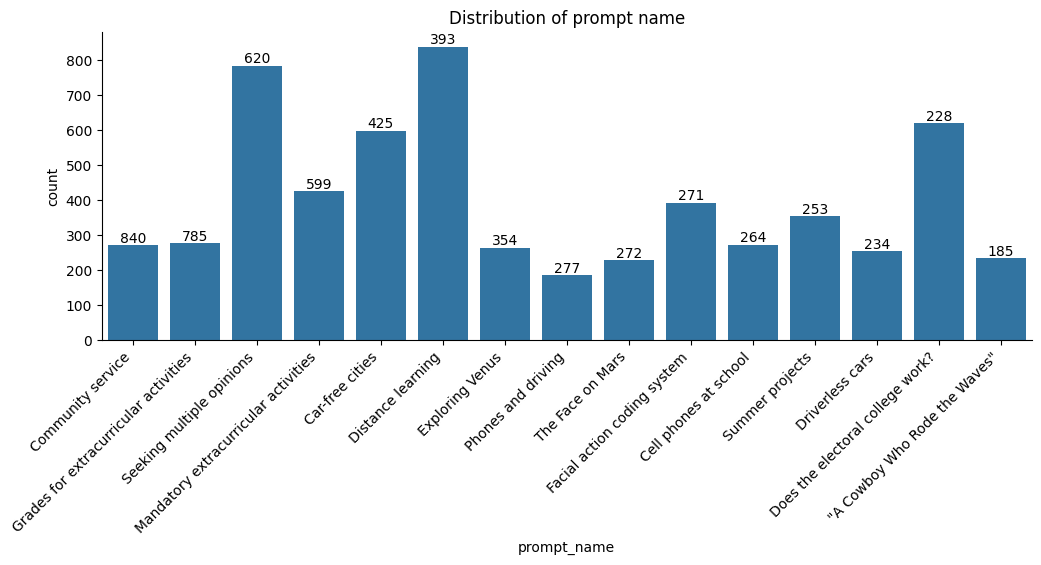

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=matched_df,
                   x="prompt_name")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels by 45 degrees

abs_values = matched_df['prompt_name'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of prompt name")


Text(0.5, 1.0, 'Distribution of Generated Text')

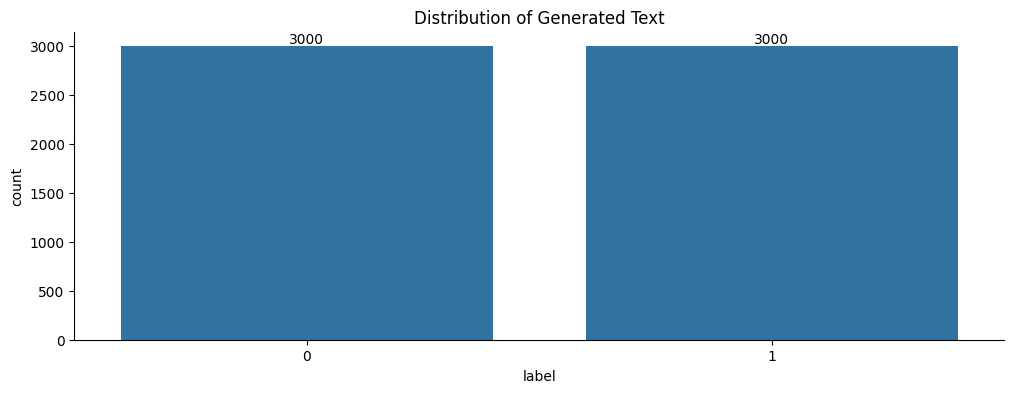

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=matched_df,
                   x="label")

abs_values = matched_df['label'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

# Understanding source & lexical_diversity

In [ ]:
# Filter human and AI data separately
human_df = new_df[new_df['source'] == 'human']
ai_df = new_df[new_df['source'] == 'AI']

# Calculate min, max, and mode (most frequent) lexical diversity for human
human_min_lexical_diversity = human_df['lexical_diversity'].min()
human_max_lexical_diversity = human_df['lexical_diversity'].max()
human_mode_lexical_diversity = human_df['lexical_diversity'].mode()[0]  # Get the first mode if multiple modes exist

# Calculate min, max, and mode (most frequent) lexical diversity for AI
ai_min_lexical_diversity = ai_df['lexical_diversity'].min()
ai_max_lexical_diversity = ai_df['lexical_diversity'].max()
ai_mode_lexical_diversity = ai_df['lexical_diversity'].mode()[0]  # Get the first mode if multiple modes exist

# Print the results
print("Human Lexical Diversity:")
print("Minimum:", human_min_lexical_diversity)
print("Maximum:", human_max_lexical_diversity)
print("Mode:", human_mode_lexical_diversity)

print("\nAI Lexical Diversity:")
print("Minimum:", ai_min_lexical_diversity)
print("Maximum:", ai_max_lexical_diversity)
print("Mode:", ai_mode_lexical_diversity)


Human Lexical Diversity:
Minimum: 0.10238095238095238
Maximum: 0.7119565217391305
Mode: 0.5

AI Lexical Diversity:
Minimum: 0.21847246891651864
Maximum: 1.0
Mode: 0.5


# Understanding source & flesch_reading_ease

In [ ]:
# Defining the readability ranges
readability_ranges = {
    'Very Difficult': (0, 30),
    'Difficult': (30, 50),
    'Moderate': (50, 70),
    'Easy': (70, 90),
    'Very Easy': (90, 100)
}

# Filter AI and human data separately
ai_df = new_df[new_df['source'] == 'AI']
human_df = new_df[new_df['source'] == 'human']

# Function to classify readability based on Flesch Reading Ease score
def classify_readability(score):
    for category, (lower, upper) in readability_ranges.items():
        if lower <= score < upper:
            return category

# Apply readability classification to AI essays
ai_df['Readability'] = ai_df['flesch_reading_ease'].apply(classify_readability)

# Apply readability classification to human essays
human_df['Readability'] = human_df['flesch_reading_ease'].apply(classify_readability)

# Print counts of essays in each readability category for AI and human sources
print("AI Essays Readability:")
print(ai_df['Readability'].value_counts())

print("\nHuman Essays Readability:")
print(human_df['Readability'].value_counts())


AI Essays Readability:
Readability
Moderate          1312
Difficult         1048
Easy               468
Very Difficult     114
Very Easy           57
Name: count, dtype: int64

Human Essays Readability:
Readability
Easy              1443
Moderate          1349
Difficult          113
Very Easy           69
Very Difficult      18
Name: count, dtype: int64


<ipython-input-32-bfbb144e410a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_df['Readability'] = ai_df['flesch_reading_ease'].apply(classify_readability)
<ipython-input-32-bfbb144e410a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_df['Readability'] = human_df['flesch_reading_ease'].apply(classify_readability)


# Models

# Naive Bayes

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score


# Feature Extraction (using TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
X = tfidf_vectorizer.fit_transform(corpus)

# Splitting Data

y = matched_df['source']
print("X shape:", X.shape)
print("y shape:", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Model Evaluation
y_pred_nb = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

X shape: (6000, 1000)
y shape: (6000,)
Accuracy: 0.9058333333333334


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

          AI       0.94      0.87      0.90       586
       human       0.88      0.94      0.91       614

    accuracy                           0.91      1200
   macro avg       0.91      0.90      0.91      1200
weighted avg       0.91      0.91      0.91      1200



# Logistic Regression

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(corpus, matched_df['source'], test_size=0.2, random_state=42)

# Vectorizing the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Training the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)

# Predicting on the test set
y_pred_lr = logreg_model.predict(X_test_tfidf)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.9716666666666667


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

          AI       0.98      0.96      0.97       586
       human       0.96      0.98      0.97       614

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)



Random Forest Accuracy: 0.9733333333333334


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          AI       0.99      0.96      0.97       586
       human       0.96      0.99      0.97       614

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



# BERT

In [ ]:
pip install tensorflow-text

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached keras-3.2.1-py3-none-any.whl (1.1 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.1
    Uninstalling tensorflow-2.15.1:
      Successfully uninstalled tensorflow-2.15.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [ ]:
pip install keras-nlp


In [ ]:
import keras_core as keras


Using TensorFlow backend


In [ ]:
import keras_nlp

In [ ]:
# We choose 512 because it's the limit of DistilBert
SEQ_LENGTH = 512

# Use a shorter sequence length.
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    "distil_bert_base_en_uncased",
    sequence_length=SEQ_LENGTH,
)

# Pretrained classifier.
classifier = keras_nlp.models.DistilBertClassifier.from_preset(
    "distil_bert_base_en_uncased",
    num_classes=2,
    activation=None,
    preprocessor=preprocessor,
)

# Re-compile (e.g., with a new learning rate)
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="Adam",  # Use the string name of the optimizer
    metrics=[
        keras.metrics.SparseCategoricalAccuracy()
    ]
)


# Access backbone programmatically (e.g., to change `trainable`).
classifier.backbone.trainable = False


classifier.summary()

100%|██████████| 226k/226k [00:00<00:00, 18.6MB/s]
100%|██████████| 515/515 [00:00<00:00, 451kB/s]
100%|██████████| 253M/253M [00:03<00:00, 86.2MB/s]


Preprocessor: "distil_bert_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)        │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "distil_bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 592,130 (2.26 MB)

 Non-trainable params: 66,362,880 (253.15 MB)

In [ ]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(matched_df["text"],
                                                    matched_df["label"],
                                                    test_size=0.33,
                                                    random_state=42)

In [ ]:
# Fit
classifier.fit(x=X_train,
               y=y_train,
               validation_data=(X_test, y_test),
               epochs=1,
               batch_size=64
              )

63/63 ━━━━━━━━━━━━━━━━━━━━ 9237s 147s/step - loss: 0.3219 - sparse_categorical_accuracy: 0.8120 - val_loss: 0.4611 - val_sparse_categorical_accuracy: 0.8971


In [ ]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Not Generated","Generated"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))


In [ ]:
y_pred_test = classifier.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 2744s 44s/step


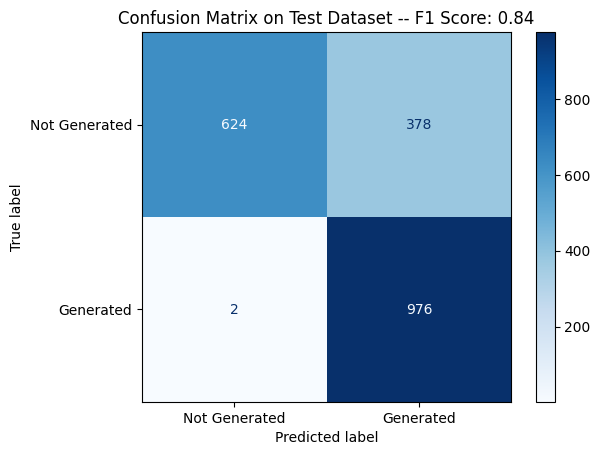

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
displayConfusionMatrix(y_test, y_pred_test,  "Test")